In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm

%matplotlib inline


Из файла hw_25000.csv, который использовали на занятии, возьмите 20 человек ростом от 170 до 180 сантиметров. Назовём это выборкой из набора данных №2.

Можно ли утверждать, что разница среднего веса людей в исходном файле и среднего веса людей во всем наборе данных №2 статистически значима?



In [291]:
data = pd.read_csv( 'hw_25000.csv', names = ['index', 'height_inches', 'weight_pounds'], header = 1, sep=';' )
data.head()

,index,height_inches,weight_pounds
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


Приведем данные к КГ и Метрам

In [292]:
data['weight'] = data['weight_pounds'] * 0.453592
data['height'] = data['height_inches'] * 2.54
data.head()


,index,height_inches,weight_pounds,weight,height
0,1,65.78331,112.9925,51.252494,167.089607
1,2,71.51521,136.4873,61.909547,181.648633
2,3,69.39874,153.0269,69.411778,176.272800
3,4,68.21660,142.3354,64.562199,173.270164
4,5,67.78781,144.2971,65.452010,172.181037


 возьмем 20 человек ростом от 170 до 180 сантиметров

In [293]:
data20 = data[(data['height'].values > 170) & (data['height'].values < 180)].head(20)
data20

,index,height_inches,weight_pounds,weight,height
2,3,69.39874,153.0269,69.411778,176.272800
3,4,68.21660,142.3354,64.562199,173.270164
4,5,67.78781,144.2971,65.452010,172.181037
5,6,68.69784,123.3024,55.928982,174.492514
6,7,69.80204,141.4947,64.180864,177.297182
7,8,70.01472,136.4623,61.898208,177.837389
8,9,67.90265,112.3723,50.971176,172.472731
11,12,67.62333,114.1430,51.774352,171.763258
12,13,68.30248,125.6107,56.976009,173.488299
13,14,67.11656,122.4618,55.547693,170.476062


Существует несколько математических допущений, на которых основан критерий Стьюдента. Основных таких допущений, как известно, два:

1. Сравниваемые выборки должны происходить из нормально распределенных совокупностей;
2. Дисперсии сравниваемых генеральных совокупностей должны быть равны.

Кроме того, в своей исходной форме, t-критерий предполагает независимость сравниваемых выборок.

Проверим что данные удовлетворяют нормальному распределению отобразив их на графике

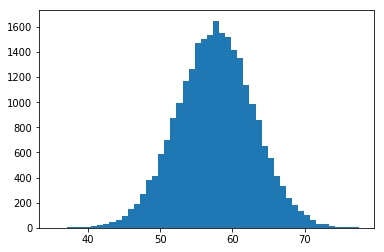

In [294]:
plt.hist( data['weight'], bins = 50 )
plt.show()

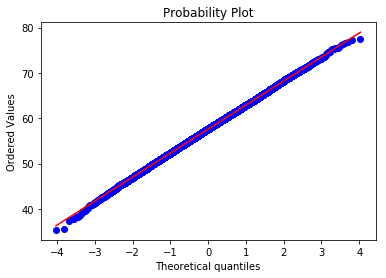

In [295]:
stats.probplot( data['weight'], dist="norm", plot=plt )
plt.show()

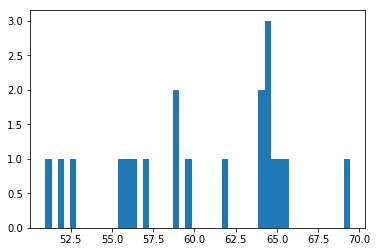

In [296]:
plt.hist( data20['weight'], bins = 50 )
plt.show()

Проверим что дисперсии данных равны, ну или хотя бы близки к друг другу:

Формула для дисперсии (а точнее среднеквадратичного отклонения, потому что на практике при анализе выборок математическое ожидание, как правило, не известно. Поэтому вместо него используют оценку – среднее арифметическое.) следующая: 


In [297]:
\begin{equation*}
\LARGE
S^2 = \sum_{i=1}^n \frac{ (x_i - \overline{x})^2 }{n}
\end{equation*}

SyntaxError: unexpected character after line continuation character (<ipython-input-297-2d552eb353a1>, line 1)

Где: 
$x$ – отдельные значения, 
$\overline{x}$ – среднее арифметическое по выборке. 
$n$ – количество элементов

Формула дисперсии соответственно $D = S^2$, а среднеквадратичное отклонение равно $\sigma = \sqrt{D} = \sqrt{S^2}$

Воспользуемся методом var поиска дисперсии из пакета numpy

In [130]:
disp = np.var(data['weight']) 
disp20 = np.var(data20['weight']) 
disp, disp20

(27.975468029185304, 26.52296682676532)

Видим что дисперсии близки к друг другу из чего можно сделать вывод что мы можем применить Т-критерий Стьюдента

Так же мы можем посмотреть на плотности распределний данных (пока не разобрался зачем эта штука нужна, но выглядит прикольно)

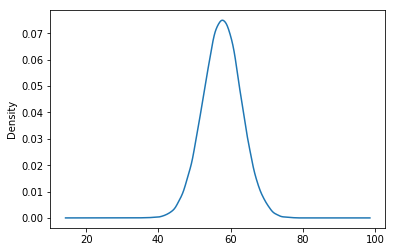

In [131]:
data['weight'].plot.density()

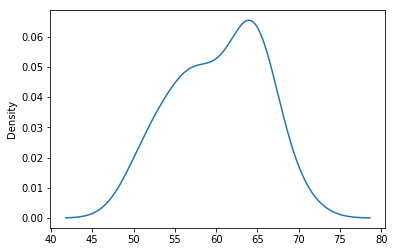

In [132]:
data20['weight'].plot.density()

$H_0$ Нулевая гипотеза — некоторое предположение о распределении вероятностей, породившем наблюдаемую выборку данных . Статистический тест позволяет проверить, согласуется ли наблюдаемая выборка с этим распределением (тогда нулевая гипотеза принимается), или не согласуется (тогда нулевая гипотеза отвергается)

Теперь рассмотрим **одновыборочный t-критерий**

Этот вариант критерия Стьюдента служит для проверки нулевой гипотезы о равенстве среднего значения ( data.mean() = $\overline{X}$ ) генеральной совокупности, из которой была взята выборка, некоторому известному значению ( data20.mean() = $m$ ):

Согласно формуле t-статистики: 

\begin{equation*}
\LARGE
t = \frac{\overline{X} - m}{ \Bigg( \frac{ S_X } { \sqrt{n} } \Bigg) }
\end{equation*}


Где: 

$\overline{X}$ \- является, в данном случае, средним значением в выборке

$m$ \- является средним значением всех данных (ожидаемое среднее)

$n$ \- количество элементов


Выборочное стандартное отклонение ( $s$ ) оценивается по наблюдаемой реализации выборки


\begin{equation*}
\LARGE
s_X = \sqrt{\frac{ \sum_{t=1}^n (X_t - \overline{X})^2 }{(n - 1)}}
\end{equation*}

Где 

$X_t$ \- является конкретным значением в выборке

$\overline{X}$ \- является, в данном случае, средним значением в выборке

Рассчитанное значение критерия мы можем далее интерпретировать следующим образом, исходя из свойств t-распределения: если это значение попадает в т.н. область отклонения нулевой гипотезы (см. рисунок ниже), то мы вправе отклонить проверяемую нулевую гипотезу. Область отклонения нулевой гипотезы для критерия Стьюдента определяется заранее принятым уровнем значимости (например, α = 0.05) и числом степеней свободы.

<img src="graphic.png">

Для того что бы можно было утверждать, что разница среднего веса людей в исходном файле и среднего веса людей во всем наборе данных №2 статистически значима проверим значимость по t-критерию указанному в формулах выше.

Это можно сделать с помощью метода ttest_1samp пакета $stats$

In [133]:
stats.ttest_1samp( data20['weight'], data['weight'].mean())

Ttest_1sampResult(statistic=2.2438433326708265, pvalue=0.036952752151293435)

По показателю pvalue=0.0369 ( который обозначает двусторонее p-значение, похоже на проценты отклонения... но я не уверен) мы можем сделать вывод что 3.69% меньше 5% указанного нами порога, а значит $H_0$ с не согласуется с нашей выборкой. А значит данная выборка статистически НЕ значима. 

Эквивалентным подходом к интерпретации результатов теста будет следующий: допустив, что нулевая гипотеза верна, мы можем рассчитать, насколько велика вероятность получить t-критерий, равный или превышающий то реальное значение, которое мы рассчитали по имеющимся выборочным данным. Если эта вероятность оказывается меньше, чем заранее принятый уровень значимости (например, Р < 0.05), мы вправе отклонить проверяемую нулевую гипотезу. 

### Добавим интерактивчик

В Jupyter'e есть возможность добавлять разные слайдеры и кнопочки путем добавления пакета с виджетами. Сделать это можно по следующей инструкции: https://github.com/jupyter-widgets/ipywidgets

Вот хорошая статья на habrahabr'e как с этим работать: https://habrahabr.ru/post/339914/

Попробуем расчитывать t-критерий изменяя возраст для выборки динамически

In [266]:
import math
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets

In [267]:
def ttest(minHeight, maxHeight):
    data20 = data[(data['height'].values > minHeight) & (data['height'].values < maxHeight)].head(20)
    p = stats.ttest_1samp( data20['weight'], data['weight'].mean())[1]
    return p

In [283]:
sliderMin = widgets.IntSlider(
    min=int(min(data['height'])), 
    max=int(max(data['height'])), 
    step=1, value=170, description='Минимальный рост', layout=Layout(width='50%', height='80px'), style= {'description_width': 'initial'})

sliderMax = widgets.IntSlider(
    min=int(min(data['height'])), 
    max=int(max(data['height'])), 
    step=1, value=180, description='Максимальный рост', layout=Layout(width='50%', height='80px'), style= {'description_width': 'initial'})

threshold = widgets.FloatSlider(min=0.01, max=0.1, step=0.01,value=0.05, description='Порог t-критерия', layout=Layout(width='50%', height='80px'), style= {'description_width': 'initial'})

In [284]:
step_btn = widgets.Button(description='Расчитать', button_style='primary')

In [285]:
def on_step_btn(d):
    p = ttest(sliderMin.value, sliderMax.value).item()
    if p > threshold.value:
        result.value = 'Значимо: p = {:.2f} % > {:.2f} % '.format(p * 100.0, threshold.value * 100)
    else:
        result.value = 'Не значимо: p = {:.2f} % < {:.2f} % '.format(p * 100.0, threshold.value * 100)

step_btn.on_click(on_step_btn)

In [286]:
result = widgets.HTML('')


In [288]:
display(sliderMin,sliderMax,threshold,step_btn, result)

IntSlider(value=168, description='Минимальный вес', layout=Layout(height='80px', width='50%'), max=190, min=153, style=SliderStyle(description_width='initial'))

IntSlider(value=172, description='Максимальный вес', layout=Layout(height='80px', width='50%'), max=190, min=153, style=SliderStyle(description_width='initial'))

FloatSlider(value=0.05, description='Порог t-критерия', layout=Layout(height='80px', width='50%'), max=0.1, min=0.01, step=0.01, style=SliderStyle(description_width='initial'))

Button(button_style='primary', description='Расчитать', style=ButtonStyle())

HTML(value='Значимо: p = 97.77 % > 5.00 % ')